# Введение в PyTorch
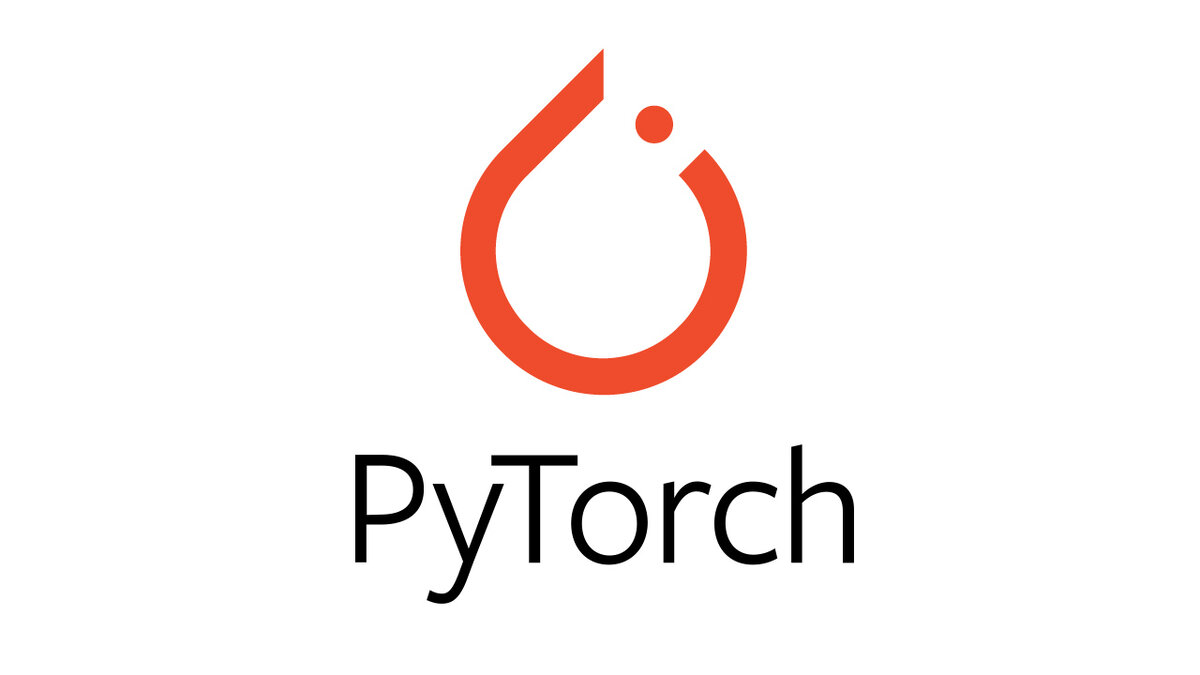

# PyTorch  - who is it?



*   Открытый фреймворк для построения и использования динамических графов
вычислений и глубокого обучения
*   Изначально разрабатывался Fecebook’s AI Research Lab (FAIR)
*   Минимум кода при максимуме возможностей




# Основной функционал

*   Вычисления многомерных матриц (тензоров) - numpy на стероидах
*   Вычисление на gpu
*   Автоматическое дифференцирование





In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.cuda.is_available()

True

# Поработаем немного с тензорами

## Создание тензора

In [ ]:
#Из списка
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

x = torch.LongTensor([[1, 2, 3], [4, 5, 6]])
x = torch.IntTensor([[1, 2, 3], [4, 5, 6]])
x = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])

# Но лучше
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float16)
x

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float16)

In [ ]:
x = torch.empty(3, 5)
x

tensor([[-4.0802e-07,  4.3236e-41, -4.0802e-07,  4.3236e-41,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  3.2781e-41],
        [ 1.8788e+31,  1.7220e+22,  2.1715e-18,  1.0871e-05,  5.2438e-08]])

In [ ]:
x = torch.ones(3, 5)
x

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [ ]:
x = torch.zeros(3, 5)
x

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
x = torch.eye(5)
x

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [ ]:
x = torch.full((3, 5), 2.5)
x

tensor([[2.5000, 2.5000, 2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000, 2.5000, 2.5000],
        [2.5000, 2.5000, 2.5000, 2.5000, 2.5000]])

In [ ]:
x = torch.randn(2, 5)
x

tensor([[ 1.7439,  0.9997, -0.2377, -0.5956, -0.1254],
        [-0.4895, -1.7089, -0.1275,  0.9048, -1.2376]])

In [ ]:
x_numpy = np.array([[1, 2, 3], [4, 5, 6]])
x = torch.from_numpy(x_numpy)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

## Какие вообще есть атрибуты у тензора

In [ ]:
print(
"Сам тензор: ", x,
'\n',
"Размерность: ", x.shape,
'\n',
"Ещё один вариант вывести размерность: ", x.size(),
'\n',
"Тип: ", x.dtype,
'\n',
"Тип процессора на котором лежит тензор: ", x.device,
'\n'
)


Сам тензор:  tensor([[1, 2, 3],
        [4, 5, 6]]) 
 Размерность:  torch.Size([2, 3]) 
 Ещё один вариант вывести размерность:  torch.Size([2, 3]) 
 Тип:  torch.int64 
 Тип процессора на котором лежит тензор:  cpu 



## Операции над тензорами

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

In [ ]:
x + y

tensor([[3, 4],
        [5, 6]])

In [ ]:
x.add(y)

tensor([[3, 4],
        [5, 6]])

In [ ]:
x.add_(y)

tensor([[3, 4],
        [5, 6]])

In [ ]:
x

tensor([[3, 4],
        [5, 6]])

In [ ]:
x = torch.tensor([[1, 2], [3, 4]])
torch.mul(x, y)

tensor([[2, 4],
        [6, 8]])

In [ ]:
torch.matmul(x, y)

tensor([[ 6,  6],
        [14, 14]])

In [ ]:
x * y

tensor([[2, 4],
        [6, 8]])

In [ ]:
x @ y

tensor([[ 6,  6],
        [14, 14]])

## Статистики - mean, max, min, std

Также можем возвращать индексы через arg функцию

In [ ]:
x.max()

tensor(4)

In [ ]:
x.argmax()

tensor(3)

# Ура, с тензорами всё, перейдём к построению модели!

### Но сначала всё же придется собрать датасет...

In [ ]:
from torch import nn
from torchvision.datasets import MNIST
from torch.nn.functional import softmax
import time

In [ ]:
path = "data/"

In [ ]:
train = MNIST(path, train=True,  download=True)
val  = MNIST(path, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 150767737.32it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42310755.79it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41978096.49it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6899865.54it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(train), len(val)

(60000, 10000)

In [ ]:
train[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
train[0][0]

In [ ]:
train[0][1]

5

In [ ]:
val[0][0]

In [ ]:
val[0][1]

7

## Однако модель не умеет работать с изображением, поэтому переведём их в тензоры

In [ ]:
import torchvision.transforms as tfs
data_tfs = tfs.Compose([
  tfs.ToTensor(),
  tfs.Normalize((0.5), (0.5))
])

In [ ]:
train = MNIST(path, train=True, transform=data_tfs,  download=True)
val  = MNIST(path, train=False, transform=data_tfs,  download=True)

In [ ]:
train[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

##Теперь разобъём данные на батчи и соберём даталоадеры



In [ ]:


batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, drop_last=True)

## А уже теперь модель)

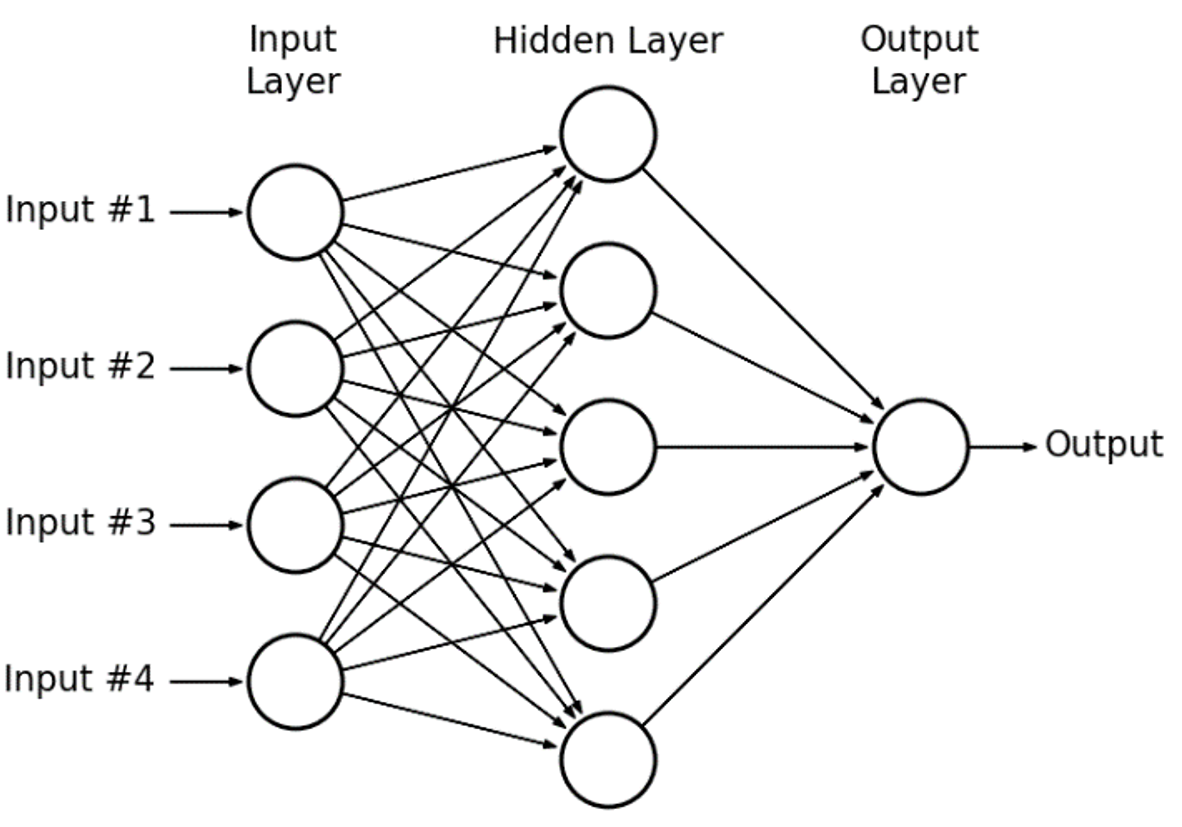

## по сути наша нейронка имеет вид:

##W_2 * ReLU(W_1 * x + b_1) + b_2

In [ ]:
class FirstMLP(nn.Module):
 def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1_weights = nn.Parameter(torch.randn(input_size,
    hidden_size))
    self.layer1_bias = nn.Parameter(torch.randn(hidden_size))
    self.layer2_weights = nn.Parameter(torch.randn(hidden_size,
    output_size))
    self.layer2_bias = nn.Parameter(torch.randn(output_size))

 def forward(self, x):
    x = x.reshape(x.shape[0], -1) # вытянем изображения в 1 вектор, сделаем так называемый img.flatten()
    h1 = torch.matmul(x, self.layer1_weights) + self.layer1_bias
    h1_act = torch.max(h1, torch.zeros(h1.size())) # ReLU руками
    output = torch.matmul(h1_act,self.layer2_weights) + self.layer2_bias
    return output

## Можно написать проще

In [ ]:
class FirstMLP(nn.Module):
 def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.layer2 = nn.Linear(hidden_size, output_size)
    self.act = nn.ReLU()

 def forward(self, x):
    x = x.reshape(x.shape[0], -1)
    x = self.layer1(x)
    x = self.act(x)
    output = self.layer2(x)
    return output

## И ещё проще

In [ ]:
class FirstMLP(nn.Module):
 def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.mlp = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size)
        )

 def forward(self, x):
    x = x.reshape(x.shape[0], -1)
    output = self.mlp(x)
    return output

## Обучение модели

In [ ]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    model.to(device)
    epoch_loss = 0.0
    predicts = []
    targets = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)
        data = data.to(device)
        target = target.to(device)
        logits = model(data)
        loss = criterion(logits, target)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        epoch_loss /= len(train_loader)
        predicts.append(logits.argmax(dim=1).detach().cpu())
        targets.append(target.detach().cpu())

    predicts = torch.cat(predicts, dim=0).numpy().flatten()
    targets = torch.cat(targets, dim=0).numpy().flatten()
    epoch_accuracy = (targets == predicts).sum() / len(targets)
    return epoch_loss, epoch_accuracy


def eval_epoch(model, val_loader, criterion, optimizer, device):
    model.eval()
    model.to(device)
    epoch_loss = 0.0
    predicts = []
    targets = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.to(device)
        target = target.to(device)
        with torch.no_grad():
            logits = model(data)
            loss = criterion(logits, target)
        epoch_loss += loss.item()
        epoch_loss /= len(train_loader)
        predicts.append(logits.argmax(dim=1).detach().cpu())
        targets.append(target.detach().cpu())

    predicts = torch.cat(predicts, dim=0).numpy().flatten()
    targets = torch.cat(targets, dim=0).numpy().flatten()
    epoch_accuracy = (targets == predicts).sum() / len(targets)
    return epoch_loss, epoch_accuracy


def train_model(model, train_loader, val_loader, criterion, optimizer, device, n_epochs):
    for epoch in range(n_epochs):
        start_time = time.time()
        train_loss, train_accuracy = train_epoch(model,
                                                train_loader,
                                                criterion,
                                                optimizer,
                                                device)
        val_loss, val_accuracy = eval_epoch(model,
                                            val_loader,
                                            criterion,
                                            optimizer,
                                            device)
        if epoch % 5 == 0:
            end_time = time.time()
            print("EPOCH: ", epoch + 1)
            print("TRAIN LOSS: ", train_loss)
            print("TRAIN ACCURACY: ", train_accuracy)
            print("VAL LOSS: ", val_loss)
            print("VAL ACCURACY: ", val_accuracy)
            print("EPOCH TIME: ", end_time - start_time, " sec")

# Всё готово, запускаем обучение!

In [ ]:
model = FirstMLP(28 * 28, 2048, 10)
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
n_epochs = 10

In [ ]:
train_model(model, train_loader, val_loader, criterion, optimizer, device, n_epochs)

EPOCH:  1
TRAIN LOSS:  0.011658559155811963
TRAIN ACCURACY:  0.1794871794871795
VAL LOSS:  0.011657038128114656
VAL ACCURACY:  0.2787793803418803
EPOCH TIME:  23.393171310424805  sec
EPOCH:  2
TRAIN LOSS:  0.010362661501735012
TRAIN ACCURACY:  0.32632211538461536
VAL LOSS:  0.010360927464343394
VAL ACCURACY:  0.35194644764957267
EPOCH TIME:  24.805261373519897  sec
EPOCH:  3
TRAIN LOSS:  0.01019574137316384
TRAIN ACCURACY:  0.3977363782051282
VAL LOSS:  0.010193950526970072
VAL ACCURACY:  0.39094217414529914
EPOCH TIME:  24.159372806549072  sec
EPOCH:  4
TRAIN LOSS:  0.01003608923489288
TRAIN ACCURACY:  0.4236111111111111
VAL LOSS:  0.010034241564731308
VAL ACCURACY:  0.41157518696581197
EPOCH TIME:  23.564921140670776  sec
EPOCH:  5
TRAIN LOSS:  0.009882634049115806
TRAIN ACCURACY:  0.43553018162393164
VAL LOSS:  0.00988071933996758
VAL ACCURACY:  0.4248798076923077
EPOCH TIME:  23.651781797409058  sec
EPOCH:  6
TRAIN LOSS:  0.009734664237931727
TRAIN ACCURACY:  0.44382678952991456
VA

KeyboardInterrupt: 

## Time to practice

Решим задачу аппроксимации одномерной функции, вы говорите, что писать - я пишу

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
data = iris["data"]
target = iris["target"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.2)

In [ ]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).long()
y_test = torch.from_numpy(y_test).long()

In [ ]:
class IrisDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return (self.X[idx],
                self.y[idx])

In [ ]:
train = IrisDataset(X_train, y_train)
test = IrisDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train, batch_size=128)
test_loader = DataLoader(test, batch_size=128)

In [ ]:
class IrisModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        return self.mlp(x)

In [ ]:
model = IrisModel(4, 100, 3)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=3e-2)

In [ ]:
train_model(model, train_loader, test_loader, criterion, optimizer, device, n_epochs=150)

EPOCH:  1
TRAIN LOSS:  1.3701801300048828
TRAIN ACCURACY:  0.31666666666666665
VAL LOSS:  1.062854290008545
VAL ACCURACY:  0.4583333333333333
EPOCH TIME:  0.007768392562866211  sec
EPOCH:  6
TRAIN LOSS:  0.827266275882721
TRAIN ACCURACY:  0.7916666666666666
VAL LOSS:  0.7903919219970703
VAL ACCURACY:  0.6583333333333333
EPOCH TIME:  0.003455638885498047  sec
EPOCH:  11
TRAIN LOSS:  0.6872313022613525
TRAIN ACCURACY:  0.6583333333333333
VAL LOSS:  0.668391764163971
VAL ACCURACY:  0.7083333333333334
EPOCH TIME:  0.003718137741088867  sec
EPOCH:  16
TRAIN LOSS:  0.6169039011001587
TRAIN ACCURACY:  0.6833333333333333
VAL LOSS:  0.6111462712287903
VAL ACCURACY:  0.6583333333333333
EPOCH TIME:  0.0034401416778564453  sec
EPOCH:  21
TRAIN LOSS:  0.5808966159820557
TRAIN ACCURACY:  0.6583333333333333
VAL LOSS:  0.5673621296882629
VAL ACCURACY:  0.6833333333333333
EPOCH TIME:  0.003438234329223633  sec
EPOCH:  26
TRAIN LOSS:  0.5381700396537781
TRAIN ACCURACY:  0.6833333333333333
VAL LOSS:  0.5